# Einführung in Python für die Computational Social Science (CSS)

## Jonas Volle
Wissenschaftlicher Mitarbeiter  
Chair of Methodology and Empirical Social Research  
Otto-von-Guericke-Universität

[jonas.volle@ovgu.de](mailto:jonas.volle@ovgu.de)

**Sprechstunde**: individuell nach vorheriger Anmeldung per [Mail](mailto:jonas.volle@ovgu.de)

Donnerstag, 04.07.2024

**Quelle:** Ich orientiere mich für diese Sitzung in Teilen am Kapitel 7 aus dem Buch:  

McLevey, John. 2021. Doing Computational Social Science: A Practical Introduction. 1st ed. Thousand Oaks: SAGE Publications.

und der Introduction to Computational Social Science methods with Python von GESIS unter: https://github.com/gesiscss/css_methods_python 

# Session 6: Textanalysen 

## Import der Textdaten

In [4]:
import cred
import requests
import pprint as pp
import time
from bs4 import BeautifulSoup

GUARDIAN_KEY = cred.GUARDIAN_KEY

In [28]:
# API Endpoint
API_ENDPOINT = 'http://content.guardianapis.com/search'

# API Parameter
PARAMS = {
    'api-key': GUARDIAN_KEY,
    'from-date': '2024-01-01',
    'to-date': '2024-06-30',
    'lang': 'en',
    'production-office': 'uk',
    'q': '"european union" OR EU OR eurozone OR brussels OR "european parliament"',
    'show-fields': 'wordcount,body,byline',
    'page-size': 50
} 


In [29]:
# GET request

response = requests.get(API_ENDPOINT, params=PARAMS) 
response_dict = response.json()['response']

In [31]:
response_dict['total']

2145

In [32]:
response_dict['pages']

43

In [35]:
all_results = []
cur_page = 1
total_pages = 1

while (cur_page <= total_pages) and (cur_page < 50):

    # Make API request
    PARAMS['page'] = cur_page
    response = requests.get(API_ENDPOINT, params=PARAMS) 
    response_dict = response.json()['response']

    # update total pages
    total_pages = response_dict['pages']

    print(f"page: {cur_page} of {total_pages}")

    # update cur page
    cur_page += 1

    # append result
    all_results += (response_dict['results'])

    # sleep
    time.sleep(1)

page: 1 of 43
page: 2 of 43
page: 3 of 43
page: 4 of 43
page: 5 of 43
page: 6 of 43
page: 7 of 43
page: 8 of 43
page: 9 of 43
page: 10 of 43
page: 11 of 43
page: 12 of 43
page: 13 of 43
page: 14 of 43
page: 15 of 43
page: 16 of 43
page: 17 of 43
page: 18 of 43
page: 19 of 43
page: 20 of 43
page: 21 of 43
page: 22 of 43
page: 23 of 43
page: 24 of 43
page: 25 of 43
page: 26 of 43
page: 27 of 43
page: 28 of 43
page: 29 of 43
page: 30 of 43
page: 31 of 43
page: 32 of 43
page: 33 of 43
page: 34 of 43
page: 35 of 43
page: 36 of 43
page: 37 of 43
page: 38 of 43
page: 39 of 43
page: 40 of 43
page: 41 of 43
page: 42 of 43
page: 43 of 43


In [38]:
all_results_df = pd.json_normalize(all_results)

In [40]:
all_results_df['text'] = [BeautifulSoup(i, "html.parser").text for i in all_results_df['fields.body']]

In [43]:
# date
all_results_df['article_date'] = pd.to_datetime(all_results_df.webPublicationDate)

# rename columns
all_results_df = all_results_df.rename(columns={'webTitle':'article_title',
                                               'webUrl':'article_url',
                                               'fields.byline': 'article_author',
                                               'sectionName': 'section_name',
                                               'pillarName': 'pillar_name'})

# filter columns
all_results_df_f = all_results_df[['id', 'article_date', 'section_name', 'pillar_name',
                                   'article_title', 'article_url', 
                                   'article_author', 'text']].copy()

In [44]:
all_results_df_f.head()

,id,article_date,section_name,pillar_name,article_title,article_url,article_author,text
0,world/article/2024/jun/11/new-meps-heading-to-...,2024-06-11 15:49:20+00:00,World news,News,"Influencers, activists and an army general: ne...",https://www.theguardian.com/world/article/2024...,Lisa O'Carroll in Brussels,While attention has focused on gains made by f...
1,world/article/2024/jun/06/mostly-they-dont-vot...,2024-06-06 04:00:46+00:00,World news,News,Dutch voters begin four-day European parliamen...,https://www.theguardian.com/world/article/2024...,Senay Boztas in The Hague and Jon Henley,Elections to the world’s only directly elected...
2,world/article/2024/jun/10/european-elections-m...,2024-06-10 11:38:28+00:00,World news,News,European elections: Paris and Berlin - not Bru...,https://www.theguardian.com/world/article/2024...,Jon Henley Europe correspondent,"So in the end, with a couple of alarming wobbl..."
3,environment/2024/feb/27/european-parliament-vo...,2024-02-27 14:31:41+00:00,World news,News,European parliament votes for watered-down law...,https://www.theguardian.com/environment/2024/f...,Ajit Niranjan,The European parliament has given the green li...
4,world/2024/feb/01/farmers-hurl-eggs-at-europea...,2024-02-01 19:09:41+00:00,World news,News,Macron calls for farming reform as food produc...,https://www.theguardian.com/world/2024/feb/01/...,"Angelique Chrisafis in Paris, Lisa O'Carroll i...",Europe’s farming sector is facing a big crisis...


In [47]:
# export full data
# all_results_df_f.to_csv('../data/guardian_eu_textdata.csv', index= False)


In [52]:
# export sampled data

all_results_df_sample_100 = all_results_df_f.sample(100, random_state=1234)
# all_results_df_sample_100.to_csv('../data/guardian_eu_textdata_sample_100.csv',
#                                  index= False)

all_results_df_sample_200 = all_results_df_f.sample(200, random_state=1234)
# all_results_df_sample_200.to_csv('../data/guardian_eu_textdata_sample_200.csv',
#                                  index= False)

all_results_df_sample_500 = all_results_df_f.sample(500, random_state=1234)
# all_results_df_sample_500.to_csv('../data/guardian_eu_textdata_sample_500.csv',
#                                  index= False)

all_results_df_sample_1000 = all_results_df_f.sample(1000, random_state=1234)
# all_results_df_sample_1000.to_csv('../data/guardian_eu_textdata_sample_1000.csv',
#                                  index= False)

## Natural Language Processing

Zunächst werden die Textdaten importiert.

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('../data/guardian_eu_textdata_sample_100.csv')

In [7]:
df.shape

(100, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              100 non-null    object
 1   article_date    100 non-null    object
 2   section_name    100 non-null    object
 3   pillar_name     100 non-null    object
 4   article_title   100 non-null    object
 5   article_url     100 non-null    object
 6   article_author  99 non-null     object
 7   text            100 non-null    object
dtypes: object(8)
memory usage: 6.4+ KB


In [9]:
df.head()

,id,article_date,section_name,pillar_name,article_title,article_url,article_author,text
0,world/2024/jan/06/hezbollah-fires-rockets-into...,2024-01-06 21:46:21+00:00,World news,News,US and EU launch twin diplomatic mission to ca...,https://www.theguardian.com/world/2024/jan/06/...,Jason Burke in Jerusalem,The most senior diplomats from the US and the ...
1,business/2024/mar/17/the-uk-economy-is-a-long-...,2024-03-17 08:00:29+00:00,Business,News,The UK economy is a long way from blossoming d...,https://www.theguardian.com/business/2024/mar/...,Larry Elliott,"It may be too little, and too late, to rescue ..."
2,technology/article/2024/may/28/techscape-ai-gl...,2024-05-28 10:47:52+00:00,Technology,News,TechScape: What we learned from the global AI ...,https://www.theguardian.com/technology/article...,Alex Hern,What does success look like for the second glo...
3,politics/2024/jan/24/faithless-tories-feign-lo...,2024-01-24 18:19:32+00:00,Politics,News,Faithless Tories feign loyalty to Rish! with a...,https://www.theguardian.com/politics/2024/jan/...,John Crace,"Cometh the hour … At times like these, we can ..."
4,world/2024/feb/12/foreign-secretaries-and-dipl...,2024-02-12 22:45:22+00:00,World news,News,Biden joins international calls for Israel to ...,https://www.theguardian.com/world/2024/feb/12/...,"Emine Sinmaz, Harriet Sherwood, Lisa O'Carrol...",Joe Biden has added his voice to growing inter...


### Tokenization

Für die Analyse werden die Texte in Analyseeinheiten zerteilt.

Die durch Leerzeichen und Interpunktion getrennten Wörter eines Textdokuments werden als Token bezeichnet.

In [16]:
from nltk.tokenize import word_tokenize

In [17]:
example_text = df.text[0]

In [18]:
word_tokenize(example_text)

['The',
 'most',
 'senior',
 'diplomats',
 'from',
 'the',
 'US',
 'and',
 'the',
 'EU',
 'launched',
 'a',
 'dual',
 'diplomatic',
 'offensive',
 'in',
 'the',
 'Middle',
 'East',
 'on',
 'Saturday',
 'aimed',
 'at',
 'calming',
 'tensions',
 'that',
 'threaten',
 'chaos',
 'and',
 'wider',
 'conflict',
 'across',
 'the',
 'region',
 '.',
 'Antony',
 'Blinken',
 ',',
 'the',
 'US',
 'secretary',
 'of',
 'state',
 ',',
 'began',
 'a',
 'five-day',
 'tour',
 'of',
 'the',
 'region',
 'with',
 'meetings',
 'in',
 'Turkey',
 'and',
 'the',
 'EU',
 '’',
 's',
 'most',
 'senior',
 'diplomat',
 'Josep',
 'Borrell',
 ',',
 'visited',
 'the',
 'Lebanese',
 'capital',
 'Beirut',
 '.',
 'The',
 'diplomatic',
 'effort',
 'came',
 'amid',
 'a',
 'new',
 'round',
 'of',
 'violence',
 'on',
 'the',
 'disputed',
 'frontier',
 'between',
 'Lebanon',
 'and',
 'Israel',
 ',',
 'which',
 'is',
 'seen',
 'by',
 'analysts',
 'as',
 'the',
 'most',
 'likely',
 'flashpoint',
 'for',
 'a',
 'new',
 'full-scal

Wir können auch alle tokens in eine List packen, um die häufigsten token zu zählen.

In [171]:
from collections import Counter

# Alle tokens in einer Liste
tokens = []
for text in df.text:
    doc = word_tokenize(text)
    for token in doc:
        tokens.append(token)

vocabulary = Counter(tokens)

In [172]:
vocabulary.most_common(20)

[('the', 8733),
 (',', 8538),
 ('.', 6174),
 ('to', 4524),
 ('of', 3998),
 ('and', 3391),
 ('in', 3364),
 ('a', 3281),
 ('’', 2526),
 ('that', 1886),
 ('s', 1885),
 ('is', 1800),
 ('for', 1648),
 ('“', 1599),
 ('on', 1587),
 ('”', 1532),
 ('The', 1060),
 ('said', 1015),
 ('with', 978),
 ('has', 974)]

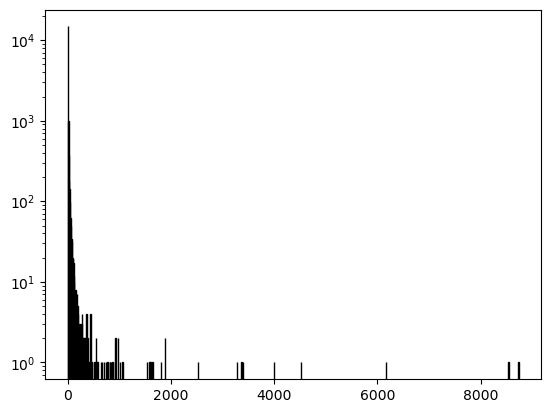

In [185]:
plt.hist(vocabulary.values(), bins=1000, color='blue', edgecolor='black')
plt.yscale('log')
plt.show()

### Stemming

Beim Stemming werden die Suffixe von Wörtern entfernt, um eine vereinfachte Form des Wortes zu erhalten.

running, runner, run -> run

Ein weit verbreiteter Stemming Algorithmus ist der von Porter.

In [ ]:
# !conda install nltk

In [ ]:
# !python -m nltk.downloader popular

In [21]:
from nltk.stem import PorterStemmer

In [22]:
stemmer = PorterStemmer()

In [187]:
example_df = pd.DataFrame({'token': word_tokenize(example_text)})
example_df.head()

,token
0,The
1,most
2,senior
3,diplomats
4,from


In [188]:
example_df['stem'] = [stemmer.stem(token) for token in example_df.token]

In [190]:
example_df.sample(20)

,token,stem
906,has,ha
399,Blinken,blinken
621,…,…
481,",",","
747,crisis,crisi
874,were,were
813,immediate,immedi
1013,in,in
371,",",","
719,injured,injur


### Lemmatization

Ein Lemma ist die Grundform eines Wortes.  

go, goes, went, gone oder going --> go

In [26]:
# import von spacy
import spacy

In [27]:
nlp = spacy.load("en_core_web_sm")

In [28]:
# Process the text with spaCy
doc = nlp(example_text)

In [29]:
doc[0]

The

In [30]:
dir(doc[0])

# https://spacy.io/api/token#attributes

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_dep',
 'has_extension',
 'has_head',
 'has_morph',
 'has_vector',
 'head',
 'i',
 'idx',
 'iob_strings',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'le

In [31]:
doc[10].text, doc[10].lemma_

('launched', 'launch')

In [32]:
lemma_df = pd.DataFrame({'token': [token.text for token in doc],
                         'lemma': [token.lemma_ for token in doc]})

lemma_df['stem'] = [stemmer.stem(i) for i in lemma_df.token]

In [33]:
lemma_df.sample(20)

,token,lemma,stem
100,the,the,the
846,were,be,were
817,Israeli,israeli,isra
464,the,the,the
226,",",",",","
715,the,the,the
269,political,political,polit
57,Turkey,Turkey,turkey
14,offensive,offensive,offens
1030,closely,closely,close


### N-grams

N-grams sind Kombinationen von n Wörtern. gensim kann Worte erkennen, die oft zusammen auftauchen.

In [34]:
import gensim

In [35]:
# gensim expect as input tokenized texts
texts = [word_tokenize(text) for text in df.text]

In [36]:
# extract bigrams
bigrams = gensim.models.Phrases(texts, min_count=5, threshold=100)
texts_bigrams = [bigrams[text] for text in texts]

In [37]:
# visualize the extracted bigrams
extracted_bigrams = []
for text in texts_bigrams:
    for el in text:
        if "_" in el:
            extracted_bigrams.append(el)

extracted_bigrams = set(extracted_bigrams)
print(extracted_bigrams)

{'waiting_list', 'Prime_Minister', 'so_far', 'Geert_Wilders', 'once_again', 'far_right', 'Soviet_Union', 'Jeremy_Hunt', 'cut_interest', 'Rachel_Reeves', 'withdrawal_agreement', 'Nazi_Germany', 'At_least', 'Raspberry_Pi', 'President_Volodymyr', 'two-state_solution', 'European_parliament', 'Rishi_Sunak', 'climate_change', 'Dieter_Helm', 'highest_level', 'International_Atomic', 'private_sector', 'yulia_navalnaya', 'Viktor_Orbán', 'Sam_Altman', 'West_Bank', 'CDU_CSU_EP', '4.2_%', 'fossil_fuels', 'economically_inactive', '_SirPeter', 'oil_depots', 'Guardian_Weekly', 'National_Statistics', 'give_money', 'general_election', 'warring_parties', 'Saudi_Arabia', 'aid_workers', 'nuclear_power', 'Updated_at', 'Boris_Johnson', 'percentage_points', 'Social_Research', 'Reuters_reports', 'financial_markets', 'Stephen_EvansUK', 'February_2022', 'Donetsk_region', 'points_out', 'civil_society', 'Santi_ABASCAL', 'artificial_intelligence', 'power_station', 'human_rights', 'air_pollution', 'net_zero', 'incom

### Stopwords

Stoppwörter sind Wörter, die häufig in einer Sprache verwendet werden, aber normalerweise keine große Bedeutung oder keinen semantischen Wert haben, wenn sie im Kontext verwendet werden. Beispiele für Stoppwörter im Englischen sind "the", "a", "an", "and", "in", "on", "is", "are", "for", "with" und so weiter.

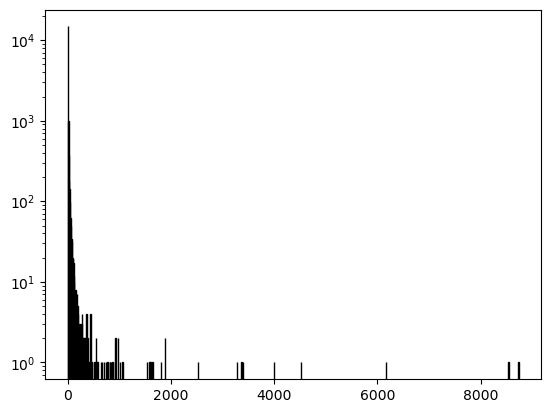

In [191]:
plt.hist(vocabulary.values(), bins=1000, color='blue', edgecolor='black')
plt.yscale('log')
plt.show()

In [40]:
from spacy.lang.en.stop_words import STOP_WORDS

In [55]:
text = df.text[40]

# Process the text with spaCy
doc = nlp(text)

# Define the list of stop words
stop_words = list(STOP_WORDS)

In [56]:
# Remove stop words from the text
filtered_text = [token.text for token in doc if token.text.lower() not in stop_words]
stop_words_removed = [token.text for token in doc if token.text.lower() in stop_words]

In [57]:
# Print the original and filtered text, and the stop words removed
print("Original tokens: ", [token.text for token in doc])

Original tokens:  ['  ', '3.26pm', 'BST', ' ', 'Summary', 'of', 'the', 'day', '  ', 'Brussels', 'admonished', 'France', 'over', 'its', 'budget', 'deficit', ',', 'as', 'the', 'country', 'prepares', 'for', 'a', 'high', '-', 'stakes', 'election', 'later', 'this', 'month', '.', ' ', 'Seven', 'European', 'countries', ',', 'including', 'France', ',', 'do', 'not', 'fulfil', 'the', 'EU', '’s', 'deficit', 'criteria', ',', 'the', 'European', 'Commission', 'said', '.', ' ', 'The', 'French', 'far', '-', 'right', 'National', 'Rally', '’s', 'Jordan', 'Bardella', 'said', 'he', 'wants', '“', 'Ukraine', 'to', 'have', 'at', 'disposal', 'the', 'ammunition', 'and', 'equipment', 'it', 'needs', 'to', 'hold', 'the', 'front', '”', 'but', 'also', 'said', 'that', '“', 'I', 'do', 'n’t', 'plan', 'to', 'send', ',', 'especially', ',', 'long', '-', 'range', 'missiles', 'or', 'other', 'weapons', 'that', 'will', 'allow', 'Ukraine', 'to', 'strike', 'the', 'Russian', 'territory', '.', '”', 'Politicians', 'across', 'the'

In [58]:
print("Filtered tokens:", filtered_text)

Filtered tokens: ['  ', '3.26pm', 'BST', ' ', 'Summary', 'day', '  ', 'Brussels', 'admonished', 'France', 'budget', 'deficit', ',', 'country', 'prepares', 'high', '-', 'stakes', 'election', 'later', 'month', '.', ' ', 'Seven', 'European', 'countries', ',', 'including', 'France', ',', 'fulfil', 'EU', 'deficit', 'criteria', ',', 'European', 'Commission', 'said', '.', ' ', 'French', 'far', '-', 'right', 'National', 'Rally', 'Jordan', 'Bardella', 'said', 'wants', '“', 'Ukraine', 'disposal', 'ammunition', 'equipment', 'needs', 'hold', '”', 'said', '“', 'plan', 'send', ',', 'especially', ',', 'long', '-', 'range', 'missiles', 'weapons', 'allow', 'Ukraine', 'strike', 'Russian', 'territory', '.', '”', 'Politicians', 'political', 'spectrum', 'France', 'spoke', 'anti', '-', 'Semitism', 'authorities', 'charged', '13', '-', 'year', '-', 'old', 'boys', 'gang', 'rape', '12', '-', 'year', '-', 'old', 'Jewish', 'girl', '.', ' ', 'Police', 'New', 'Caledonia', 'arrested', 'protest', 'leader', 'Christian

In [59]:
print("Stop words removed: ", stop_words_removed)

Stop words removed:  ['of', 'the', 'over', 'its', 'as', 'the', 'for', 'a', 'this', 'do', 'not', 'the', '’s', 'the', 'The', '’s', 'he', 'to', 'have', 'at', 'the', 'and', 'it', 'to', 'the', 'front', 'but', 'also', 'that', 'I', 'do', 'n’t', 'to', 'or', 'other', 'that', 'will', 'to', 'the', 'across', 'the', 'in', 'out', 'against', 'after', 'two', 'with', 'the', 'of', 'a', 'in', 'at', 'the', 'of', 'the', 'the', 'the', 'a', 'and', 'in', 'was', 're', 'as', 'of', 'the', '’s', 'the', '’s', 'The', 'in', 'the', 'and', 'as', 'The', 'for', 'another', 'as', 'of', 'the', 'for', 'as', 'The', '’s', 'in', 'the', 'has', 'a', 'for', 'another', 'as', 'of', 'the', 'The', 'has', 'just', 'as', 'the', 'for', 'the', 'of', 'of', 'the', 'a', 'of', 'the', 'from', 'the', 'has', 'an', 'is', 'not', 'yet', 'We', 'do', 'not', 'but', 'on', 'both', 'the', 'and', 'the', 'this', 'has', 'the', 'of', 'at', 'a', 'when', 'the', 'of', 'the', 'in', 'the', 'had', 'to', 'the', 'of', 'who', 'had', 'already', 'been', 'for', 'two', '

In [192]:
print(len(stop_words))
stop_words.extend(["bst"])
print(len(stop_words))

328
329


In [193]:
'bst' in stop_words

True

### Parts of Speech

English has 9 main categories:

verb — Expresses an action or a state of being. E.g. jump, is, write, become  
noun — identifies a person, a place or a thing or names of particular of one of these (pronoun). E.g. man, house, happiness  
pronoun — can replace a noun or noun phrase. E.g. she, we, they, it  
determiner — Is placed in front of a noun to express a quantity or clarify  what the noun refers to 
adjective — modifies a noun or a pronoun. E.g. pretty, old, blue, smart  
adverb — modifies a verb, an adjective, or another adverb. E.g. gently, extremely, carefully, well  
preposition — Connect a noun/pronoun to other parts of the sentence. E.g. by, with, about, until  
conjunction — glue words, clauses, and sentences together. E.g. and, but, or, while, because  
interjection — Expresses emotion in a sudden or exclamatory way. E.g. oh!, wow!, oops!  

In [60]:
for token in doc:
    print(token.text, token.pos_)

   SPACE
3.26pm PROPN
BST PROPN
  SPACE
Summary PROPN
of ADP
the DET
day NOUN
   SPACE
Brussels PROPN
admonished VERB
France PROPN
over ADP
its PRON
budget NOUN
deficit NOUN
, PUNCT
as SCONJ
the DET
country NOUN
prepares VERB
for ADP
a DET
high ADJ
- PUNCT
stakes NOUN
election NOUN
later ADV
this DET
month NOUN
. PUNCT
  SPACE
Seven NUM
European ADJ
countries NOUN
, PUNCT
including VERB
France PROPN
, PUNCT
do AUX
not PART
fulfil VERB
the DET
EU PROPN
’s PART
deficit NOUN
criteria NOUN
, PUNCT
the DET
European PROPN
Commission PROPN
said VERB
. PUNCT
  SPACE
The DET
French ADJ
far ADV
- PUNCT
right NOUN
National PROPN
Rally PROPN
’s PART
Jordan PROPN
Bardella PROPN
said VERB
he PRON
wants VERB
“ PUNCT
Ukraine PROPN
to PART
have VERB
at ADP
disposal NOUN
the DET
ammunition NOUN
and CCONJ
equipment NOUN
it PRON
needs VERB
to PART
hold VERB
the DET
front NOUN
” PUNCT
but CCONJ
also ADV
said VERB
that SCONJ
“ PUNCT
I PRON
do AUX
n’t PART
plan VERB
to PART
send VERB
, PUNCT
especially ADV
,

In [61]:
spacy.explain("PROPN")

'proper noun'

In [64]:
pd.DataFrame({'token': [token.text for token in doc],
             'pos': [token.pos_ for token in doc]}).sample(20)

,token,pos
2239,.,PUNCT
1248,at,ADP
607,French,ADJ
1091,group,NOUN
1809,,SPACE
2112,",",PUNCT
1040,commitments,NOUN
330,),PUNCT
1467,.,PUNCT
2206,will,AUX


### Named enitity recognition

In [65]:
example_text_entities = pd.DataFrame({'entity': [ent.text for ent in doc.ents],
                                      'entity_label': [ent.label_ for ent in doc.ents]})

In [194]:
example_text_entities[example_text_entities.entity_label == 'PERSON'].head()

,entity,entity_label
12,Jordan Bardella,PERSON
22,Christian Tein,PERSON
24,Manfred Weber,PERSON
31,Bas Eickhout,PERSON
32,Terry Reintke,PERSON


In [195]:
example_text_entities[example_text_entities.entity_label == 'PERSON'].value_counts('entity')

entity
Emmanuel Macron                               5
Jordan Bardella                               4
Roberta Metsola                               3
Nicole Belloubet                              3
Manfred Weber                                 2
Christian Tein                                2
Terry Reintke                                 2
Bas Eickhout                                  2
pic.twitter.com/Px40sUtPEZ— Andreas Schwab    1
l'Ukraine d'assurer sa Défense                1
jeune fille de 12                             1
de la France                                  1
Simon Harris TD                               1
Bardella                                      1
Reintke                                       1
L'horreur n'a plus de limites                 1
L'Ukraine                                     1
Je                                            1
Herzlichen Glückwunsch 🎉                      1
Eickhout                                      1
Bernard Guetta                   

### Preprocessing Pipeline

Verschiedene Vorverarbeitungsschritte können wir in einer Pipeline an Funktionen zusammenfassen:

In [133]:
import spacy
import re # regex
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_sm")

Sonderzeichen, Zahlen, Zeilenumbrüch etc. entfernen. In dieser Funktion benutzen wir reguläre Ausdrücke `regex`. Eine Übersicht über diese Ausdrücke finden wir z.B. hier: https://images.datacamp.com/image/upload/v1665049611/Marketing/Blog/Regular_Expressions_Cheat_Sheet.pdf

In [69]:
def clean_text(text):

    # remove punctuation and special characters
    pattern = r"[^\w\s]"
    text_clean = re.sub(pattern, "", text)

    # remove numbers
    pattern = r"\d+"
    text_clean = re.sub(pattern, "", text_clean)

    # remove all non-ASCII characters
    pattern = r"[^\x00-\x7F]+"
    text_clean = re.sub(pattern, "", text_clean)

    # remove new line characters
    text_clean.replace("\n", "")

    # remove empty spaces left by regex
    text_clean = ' '.join(text_clean.split())
    
    return text_clean

... Tokenisierung

In [70]:
def tokenization(texts):
    #return [text.split(" ") for text in texts]
    return [word_tokenize(text) for text in texts]

... Stopwords entfernen

In [71]:
def remove_stop_words(texts, stop_words=[]):
    if stop_words == []:
        stop_words = list(STOP_WORDS)
    return [[word for word in doc if word.lower() not in stop_words] for doc in texts]


... Bigrams hinzufügen

In [72]:
def add_bigrams(texts):
    bigrams = gensim.models.Phrases(texts, min_count=5, threshold=100)
    return [bigrams[text] for text in texts]

... stemmen

In [73]:
def stemming(texts):
    stemmer = PorterStemmer()
    return [[stemmer.stem(word) for word in doc] for doc in texts]

... lemmatisieren

In [74]:
def lemmatization(texts):
    texts_lemma = []
    for text in texts:
        doc = nlp(" ".join(text)) 
        texts_lemma.append([token.lemma_ for token in doc])
    return texts_lemma

Alle Funktionen können wir jetzt in eine Pipeline integrieren. Diese Funktion nimmt einen Textkorpus auf. Ein Textkorpus besteht aus einer Reihe an Dokumenten. Diese Dokumente können z.B. in einer Liste oder einem array gespeichert sein.

In [150]:
stop_words = list(STOP_WORDS)
stop_words.extend(['bst', 'year'])

In [152]:
def pipeline(corpus):
    print("Cleaning text...")
    corpus = [clean_text(text) for text in corpus]

    print("Tokenization...")
    corpus = tokenization(corpus)

    print("Lowercasing...")
    corpus = [[el.lower() for el in text] for text in corpus]

    print("Stop Words removal...")
    corpus = remove_stop_words(corpus, stop_words=stop_words)
    
    print("Extract bigrams...")
    corpus = add_bigrams(corpus)

    print("Lemmatization...")
    corpus = lemmatization(corpus)

    print("Stop Words removal after lemmatizing...")
    corpus = remove_stop_words(corpus, stop_words)

    print("Removing tokens that are too short...")
    corpus = [[c for c in text if len(c) > 2] for text in corpus]

    return corpus

Nun erstellen wir unseren Corpus:

In [118]:
df.head()

,id,article_date,section_name,pillar_name,article_title,article_url,article_author,text,text_preprocessed
0,world/2024/jan/06/hezbollah-fires-rockets-into...,2024-01-06 21:46:21+00:00,World news,News,US and EU launch twin diplomatic mission to ca...,https://www.theguardian.com/world/2024/jan/06/...,Jason Burke in Jerusalem,The most senior diplomats from the US and the ...,"[senior, diplomat, launch, dual, diplomatic, o..."
1,business/2024/mar/17/the-uk-economy-is-a-long-...,2024-03-17 08:00:29+00:00,Business,News,The UK economy is a long way from blossoming d...,https://www.theguardian.com/business/2024/mar/...,Larry Elliott,"It may be too little, and too late, to rescue ...","[little, late, rescue, rishi_sunak, thumping, ..."
2,technology/article/2024/may/28/techscape-ai-gl...,2024-05-28 10:47:52+00:00,Technology,News,TechScape: What we learned from the global AI ...,https://www.theguardian.com/technology/article...,Alex Hern,What does success look like for the second glo...,"[success, look, like, second, global, summit, ..."
3,politics/2024/jan/24/faithless-tories-feign-lo...,2024-01-24 18:19:32+00:00,Politics,News,Faithless Tories feign loyalty to Rish! with a...,https://www.theguardian.com/politics/2024/jan/...,John Crace,"Cometh the hour … At times like these, we can ...","[cometh, hour, time, like, turn, person, woman..."
4,world/2024/feb/12/foreign-secretaries-and-dipl...,2024-02-12 22:45:22+00:00,World news,News,Biden joins international calls for Israel to ...,https://www.theguardian.com/world/2024/feb/12/...,"Emine Sinmaz, Harriet Sherwood, Lisa O'Carrol...",Joe Biden has added his voice to growing inter...,"[joe_biden, add, voice, grow, international, i..."


In [119]:
df.text

0     The most senior diplomats from the US and the ...
1     It may be too little, and too late, to rescue ...
2     What does success look like for the second glo...
3     Cometh the hour … At times like these, we can ...
4     Joe Biden has added his voice to growing inter...
                            ...                        
95    Apple has condemned Spotify over the long-runn...
96    \n 5.44pm GMT \nClosing post\n\nThat may be al...
97    Battersea power station offered no prospect of...
98      4.45pm BST  Afternoon summary   The Conserva...
99    It was August 2017 when the world really start...
Name: text, Length: 100, dtype: object

In [153]:
df['text_preprocessed'] = pipeline(df.text)

Cleaning text...
Tokenization...
Lowercasing...
Stop Words removal...
Extract bigrams...
Lemmatization...
Stop Words removal after lemmatizing...
Removing tokens that are too short...


In [154]:
df[['text', 'text_preprocessed']]

,text,text_preprocessed
0,The most senior diplomats from the US and the ...,"[senior, diplomat, launch, dual, diplomatic, o..."
1,"It may be too little, and too late, to rescue ...","[little, late, rescue, rishi_sunak, thumping, ..."
2,What does success look like for the second glo...,"[success, look, like, second, global, summit, ..."
3,"Cometh the hour … At times like these, we can ...","[cometh, hour, time, like, turn, person, woman..."
4,Joe Biden has added his voice to growing inter...,"[joe_biden, add, voice, grow, international, i..."
...,...,...
95,Apple has condemned Spotify over the long-runn...,"[apple, condemn, spotify, longrunning, competi..."
96,\n 5.44pm GMT \nClosing post\n\nThat may be al...,"[pm_gmt, closing, post, hectic, day, davos, ar..."
97,Battersea power station offered no prospect of...,"[battersea, power_station, offer, prospect, lu..."
98,4.45pm BST Afternoon summary The Conserva...,"[afternoon, summary, conservative, minister, a..."


In [241]:
from gensim.corpora import Dictionary

# we create a dictionary
dictionary = Dictionary(df.text_preprocessed)

In [242]:
print(f"Number of words in the dictionary: {len(dictionary)}")
print("Dictionary first 5 elements (id, token):", list(dictionary.items())[:5])

Number of words in the dictionary: 11136
Dictionary first 5 elements (id, token): [(0, 'abduct'), (1, 'accord'), (2, 'acute'), (3, 'administration'), (4, 'agency')]


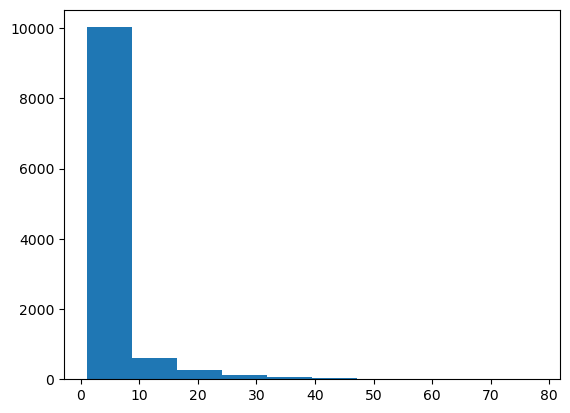

In [243]:
plt.hist(dictionary.dfs.values())
plt.show()

In [244]:
# Prune the dictionary: remove words that appear in less than 2 documents
dictionary.filter_extremes(no_below=5, no_above=0.95)

In [245]:
print(f"Number of words in the dictionary after pruning: {len(dictionary)}")

Number of words in the dictionary after pruning: 2044


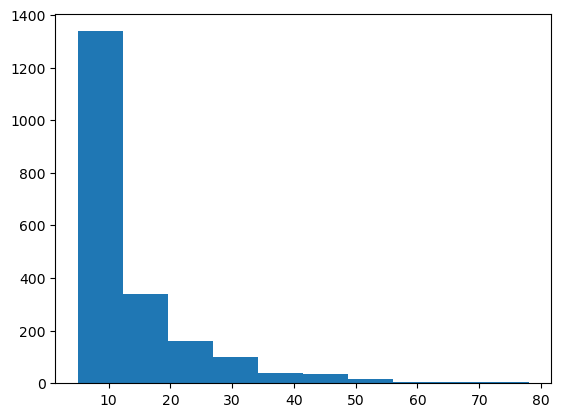

In [246]:
plt.hist(dictionary.dfs.values())
plt.show()

In [247]:
# covert the corpus to bag of words format 
document_term_matrix = [dictionary.doc2bow(text) for text in df.text_preprocessed]

In [248]:
print("First document in bag-of-words format (raw):", document_term_matrix[0])

First document in bag-of-words format (raw): [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 5), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 6), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 3), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 3), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 3), (78, 1), (79, 1), (80, 1), (81, 2), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 3), (88, 1), (89, 1), (90, 1), (91, 1), (92, 12), (93, 1), (94, 2), (95, 1), (96, 9), (97, 2), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (10

In [249]:
print("First document in bag-of-words format (word, frequency):",
      [[dictionary[id], freq] for id, freq in document_term_matrix[0]])

First document in bag-of-words format (word, frequency): [['accord', 1], ['acute', 1], ['administration', 1], ['agency', 1], ['ago', 1], ['ahead', 1], ['aid', 2], ['aim', 1], ['alarm', 1], ['allow', 1], ['ally', 1], ['alongside', 1], ['amid', 1], ['analyst', 2], ['anger', 1], ['appear', 1], ['approach', 1], ['attack', 5], ['authority', 1], ['bad', 1], ['base', 1], ['basic', 1], ['begin', 1], ['believe', 1], ['benjamin_netanyahu', 1], ['body', 1], ['campaign', 1], ['capital', 1], ['carry', 1], ['casualty', 1], ['cause', 1], ['channel', 2], ['chaos', 1], ['child', 1], ['choice', 1], ['city', 1], ['civilian', 2], ['close', 1], ['closely', 1], ['come', 1], ['commercial', 1], ['commit', 1], ['concern', 1], ['condemn', 1], ['conflict', 6], ['continue', 1], ['control', 2], ['conversation', 1], ['country', 1], ['cover', 1], ['create', 1], ['crisis', 1], ['damage', 1], ['day', 1], ['death', 1], ['december', 1], ['defence', 1], ['department', 1], ['deputy', 1], ['destroy', 1], ['destruction', 1]

Top words im Corpus:

In [250]:
word_counts_df = pd.DataFrame([[dictionary[id], freq] for id, freq in dictionary.cfs.items()],
                            columns=['word', 'count']).sort_values('count', ascending=False)

word_counts_df.head(20)

,word,count
1004,ukraine,463
165,people,395
317,government,386
553,party,371
1027,russia,296
203,country,294
653,labour,288
26,new,272
1002,russian,262
453,european,247


In [251]:
import seaborn as sns
import matplotlib.pyplot as plt

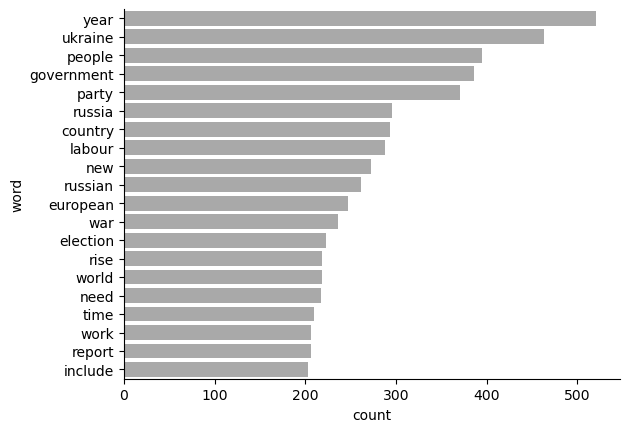

In [252]:
ax = sns.barplot(data=top_words, 
                 y='word',
                 x='count',
                 color='darkgray') 
sns.despine() 
plt.show()

In [253]:
word_counts_df.tail(20)

,word,count
313,unpopular,5
614,honour,5
1948,columnist,5
1946,councillor,5
1061,fend,5
1712,exact,5
1943,jack,5
1721,optimism,5
1723,hang,5
91,staunch,5


### export

In [263]:
import pickle as pkl

with open("../data/dict_gensim.pkl", "wb") as file:
    pkl.dump(dictionary, file)

with open("../data/text_df.pkl", "wb") as file:
    pkl.dump(df, file)

with open("../data/document_term_matrix.pkl", "wb") as file:
    pkl.dump(document_term_matrix, file)

<div class='alert alert-block alert-success'>

### Aufgabe 1

--> session_06_excercise_01.ipynb

</div>

## Topic Model

Topic Models sind probabilistische Modelle, die zur Bestimmung von semantischen Clustern in Dokumentensammlungen verwendet werden. Sie eignen sich für die Erforschung von Textdaten, da sie thematische Strukturen finden, die nicht im Voraus definiert sind. Die Berechnung zielt darauf ab, die proportionale Zusammensetzung einer festen Anzahl von Themen in den Dokumenten einer Sammlung zu bestimmen. Diese semantischen Cluster können wir als Themen interpretieren.

Topic Modelle liefern Wahrscheinlichkeitsverteilungen über die Menge aller Wörter für jedes Thema und Wahrscheinlichkeitsverteilungen über die Menge der Themen für jedes Dokument. Jede kleinste Analyseeinheit (z. B. ein Wort oder ein n-Gramm) hat eine Wahrscheinlichkeit, zu jedem Thema zu gehören, und jedes Thema hat eine Wahrscheinlichkeit, in jedem Dokument aufzutreten. Ein Thema wird semantisch interpretierbar durch die n wahrscheinlichsten Wörter, die es enthält.

In [264]:
# import
# Load the gensim dictionary
with open("../data/dict_gensim.pkl", "rb") as file:
    dictionary = pkl.load(file)

# Load the DataFrame
with open("../data/text_df.pkl", "rb") as file:
    df = pkl.load(file)

# Load the document term matrix
with open("../data/document_term_matrix.pkl", "rb") as file:
    document_term_matrix = pkl.load(file)

In [267]:
import gensim
from gensim.models import LdaModel

# train an LDA model on the corpus
lda_model = LdaModel(document_term_matrix,
                     id2word=dictionary, 
                     num_topics=10, 
                     passes = 10,
                     random_state=1234)

In [268]:
# print the topics and associated keywords
for topic in lda_model.print_topics():
    print(topic)

(0, '0.017*"ukraine" + 0.012*"war" + 0.011*"apple" + 0.008*"nato" + 0.007*"russia" + 0.007*"law" + 0.007*"government" + 0.006*"people" + 0.005*"state" + 0.005*"company"')
(1, '0.014*"rise" + 0.012*"rate" + 0.012*"market" + 0.011*"fall" + 0.010*"inflation" + 0.010*"high" + 0.009*"growth" + 0.008*"economy" + 0.008*"people" + 0.008*"labour"')
(2, '0.018*"party" + 0.016*"european" + 0.012*"israel" + 0.008*"group" + 0.008*"right" + 0.008*"political" + 0.007*"parliament" + 0.007*"election" + 0.007*"government" + 0.006*"include"')
(3, '0.022*"ukraine" + 0.017*"russia" + 0.013*"attack" + 0.011*"russian" + 0.011*"war" + 0.009*"people" + 0.008*"region" + 0.008*"military" + 0.008*"ukrainian" + 0.007*"minister"')
(4, '0.011*"people" + 0.010*"claim" + 0.006*"report" + 0.006*"israel" + 0.006*"drug" + 0.006*"service" + 0.006*"agency" + 0.006*"security" + 0.005*"guardian" + 0.005*"work"')
(5, '0.015*"world" + 0.012*"gmt" + 0.008*"add" + 0.008*"ukraine" + 0.007*"pm_gmt" + 0.007*"country" + 0.007*"tell"

Auswahl des Modells anhand des Kohärenz Scores. 


Die Topic Kohärenz bewerten ein einzelnes Topic, indem sie den Grad der semantischen Ähnlichkeit zwischen hoch bewerteten Wörtern im Thema messen. Diese Messungen helfen bei der Unterscheidung zwischen Themen, die semantisch interpretierbar sind, und Themen, die Artefakte statistischer Inferenz sind.  Zusätzlich können wir verschiedene Modelle mit dem Wert der mittleren Kohärenz vergleichen.

In [256]:
from gensim.models import CoherenceModel
import numpy as np

scores = []
models = []

for num_topics in np.arange(5, 30):

    # fit LDA model
    lda_model = LdaModel(document_term_matrix,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=12345
                        )

    # compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=df.text_preprocessed,
                                         dictionary=dictionary)
    
    coherence_lda = coherence_model_lda.get_coherence()
    print(f'Coherence Score with {num_topics} topics: {coherence_lda}')

    scores.append([num_topics, coherence_lda])
    models.append(lda_model)

Coherence Score with 5 topics: 0.22708683887081743
Coherence Score with 6 topics: 0.23102000322291982
Coherence Score with 7 topics: 0.23083240938171132
Coherence Score with 8 topics: 0.2433645845221296
Coherence Score with 9 topics: 0.23739182991717034
Coherence Score with 10 topics: 0.23454469514190382
Coherence Score with 11 topics: 0.24294287347938107
Coherence Score with 12 topics: 0.23165283620688013
Coherence Score with 13 topics: 0.23914430911543466
Coherence Score with 14 topics: 0.23538256056823942
Coherence Score with 15 topics: 0.23638304325307813
Coherence Score with 16 topics: 0.23070347809776526
Coherence Score with 17 topics: 0.23575771175816193
Coherence Score with 18 topics: 0.23665909829625228
Coherence Score with 19 topics: 0.24563758955232612
Coherence Score with 20 topics: 0.24468607143179538
Coherence Score with 21 topics: 0.24695355572820357
Coherence Score with 22 topics: 0.24689950861908877
Coherence Score with 23 topics: 0.2583859218701663
Coherence Score wit

In [257]:
scores_df = pd.DataFrame(scores, columns=['num_topic', 'coherence_score'])

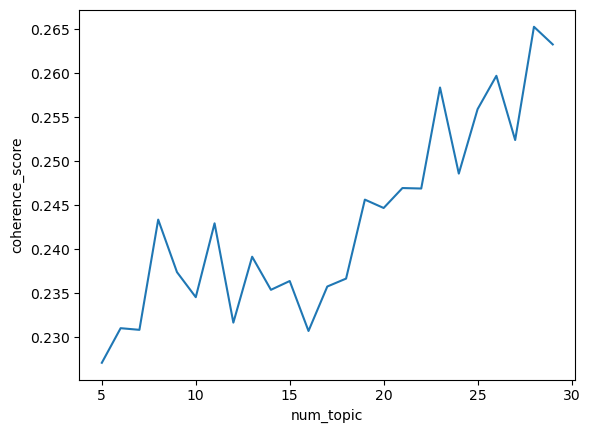

In [258]:
ax = sns.lineplot(data=scores_df, x='num_topic', y='coherence_score')
plt.show()

In [259]:
scores_df.sort_values('coherence_score', ascending=False)

,num_topic,coherence_score
23,28,0.265288
24,29,0.263283
21,26,0.259715
18,23,0.258386
20,25,0.255923
22,27,0.252413
19,24,0.248595
16,21,0.246954
17,22,0.246900
14,19,0.245638


In [260]:
# best model
lda_model_best = models[23]

In [261]:
len(lda_model_best.print_topics(30))

28

In [262]:
import pyLDAvis
import pyLDAvis.gensim_models

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_best,
                                     document_term_matrix,
                                     dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.012975 -0.010623       1        1  24.209387
9     -0.017468 -0.008063       2        1  17.154296
22     0.028437  0.001781       3        1   9.113460
26     0.001662 -0.003976       4        1   8.534139
4     -0.008621 -0.003218       5        1   8.039352
15    -0.004624  0.002832       6        1   4.941584
18     0.025350  0.001549       7        1   3.893782
2     -0.019439  0.006615       8        1   2.643355
21    -0.001983 -0.016710       9        1   2.245509
0     -0.008778 -0.005093      10        1   2.212820
19     0.027071  0.004367      11        1   2.077004
27    -0.025113  0.009830      12        1   2.042248
17     0.010645 -0.007302      13        1   1.995505
1     -0.011858  0.011822      14        1   1.945612
20     0.002557 -0.009375      15        1   1.922435
12     0.029173  0.011864      16        1   1.917959
24    -0.009610 -0.007999      17        1   1.481286
25     0.017043  0.008037      18        1   1.146973
3     -0.013633  0.023993      19        1   0.775202
13    -0.012619  0.022321      20        1   0.546951
8     -0.025033 -0.020697      21        1   0.497149
14    -0.002005 -0.014789      22        1   0.359815
6     -0.004272  0.000457      23        1   0.138652
5     -0.003089 -0.001334      24        1   0.108131
11     0.003290  0.025474      25        1   0.038538
23     0.006084 -0.017297      26        1   0.006350
16     0.007860 -0.014939      27        1   0.006253
10    -0.004005  0.010472      28        1   0.006253, topic_info=            Term        Freq       Total Category  logprob  loglift
1227     ukraine  459.000000  459.000000  Default  30.0000  30.0000
160       people  397.000000  397.000000  Default  29.0000  29.0000
621        party  353.000000  353.000000  Default  28.0000  28.0000
299   government  374.000000  374.000000  Default  27.0000  27.0000
48       country  308.000000  308.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
601       labour    0.011803  319.213082  Topic28  -5.7093  -0.5253
218         tell    0.010520  167.423588  Topic28  -5.8244   0.0049
142          new    0.011092  290.536703  Topic28  -5.7715  -0.4934
376         time    0.010791  218.109762  Topic28  -5.7991  -0.2342
328         need    0.010472  205.104073  Topic28  -5.8290  -0.2027

[2011 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1491      1  0.163781  abandon
1491      2  0.163781  abandon
1491      3  0.081891  abandon
1491      4  0.081891  abandon
1491      5  0.163781  abandon
...     ...       ...      ...
1250      2  0.075431     zone
1250      3  0.528019     zone
1250      4  0.075431     zone
1250      5  0.113147     zone
1250      7  0.075431     zone

[8724 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 10, 23, 27, 5, 16, 19, 3, 22, 1, 20, 28, 18, 2, 21, 13, 25, 26, 4, 14, 9, 15, 7, 6, 12, 24, 17, 11])

<div class='alert alert-block alert-success'>

### Aufgabe 2

--> session_06_excercise_02.ipynb

</div>